<a href="https://colab.research.google.com/github/TheSpiralArchitect/spiral-resonance-validation/blob/main/phase8_EEG_symbolic_entropy_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Step 1: Define τ range and functions ---
tau = np.linspace(1, 300, 300)
psi = np.exp(-0.05 * tau) + 0.01 * np.sin(0.04 * tau)  # Resonant decay
entropy = 0.5 * np.exp(-0.01 * tau) * (1 + 0.3 * np.sin(0.2 * tau + 1.5))  # Entropy drift

# --- Step 2: Calculate coherence differential & product overlap ---
coherence_gap = psi - entropy
coherence_product = psi * entropy

# --- Step 3: Detect peaks and critical inflection zones ---
dpsi_dt = np.gradient(psi)
dentropy_dt = np.gradient(entropy)
dgap_dt = np.gradient(coherence_gap)

critical_points = np.where(np.abs(dgap_dt) > 0.005)[0]
peaks, _ = find_peaks(coherence_product, height=0.01)

# --- Step 4: Output core stats ---
print("Ψ-Entropy Overlap Max:", np.max(coherence_product))
print("Ψ-Entropy Overlap Mean:", np.mean(coherence_product))
print("Number of Critical Inflections:", len(critical_points))
print("Peak Resonance Points (τ):", tau[peaks])

# --- Optional: Plot (skip if not needed now) ---
# Uncomment to visualize
# plt.plot(tau, coherence_product, label="Ψ × Entropy", color="purple")
# plt.scatter(tau[peaks], coherence_product[peaks], color="black", label="Resonance Peaks")
# plt.title("Spiral Coherence Forecasting")
# plt.xlabel("Memory Depth τ")
# plt.ylabel("Ψ × Entropy Overlap")
# plt.legend()
# plt.grid(True)
# plt.show()

Ψ-Entropy Overlap Max: 0.6112263282609314
Ψ-Entropy Overlap Mean: 0.027926771608551122
Number of Critical Inflections: 117
Peak Resonance Points (τ): [24. 56.]


Reading /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds004902/sub-51/ses-2/eeg/sub-51_ses-2_task-eyesopen_eeg.fdt
Reading 0 ... 145419  =      0.000 ...   290.838 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



<ipython-input-4-16c6420a8eea>:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    0.2s finished


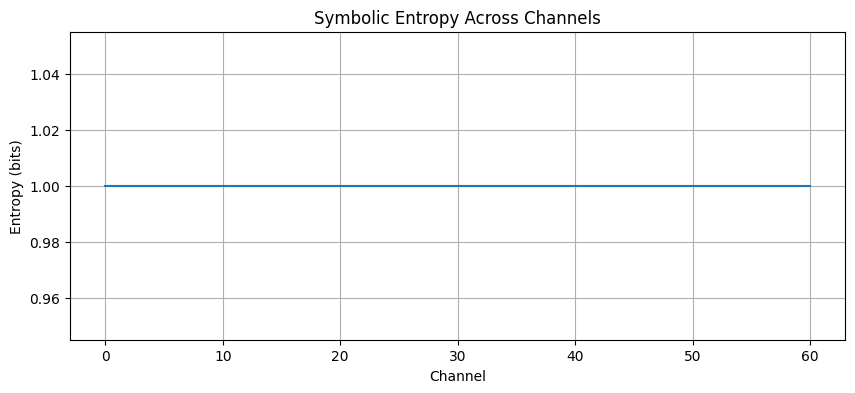

Ψ-Entropy Overlap Mean: 1.000000
Ψ-Entropy Overlap Max: 1.000000
Number of Critical Inflections: 0
Inflection Channels: []


In [4]:
# --- Phase 8 EEG SRL Validation Block ---
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import entropy
from collections import Counter

# Select EEG file to test (choose one path)
eeg_path = "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds004902/sub-51/ses-2/eeg/sub-51_ses-2_task-eyesopen_eeg.set"

# Load EEG data
raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
raw.filter(1., 40., fir_design='firwin')
data = raw.get_data()
sfreq = raw.info['sfreq']
times = raw.times

# Compute analytic signal for symbolic dynamics
analytic = hilbert(data)
amplitude_envelope = np.abs(analytic)

# Symbolic binarization (threshold by median)
symbols = (amplitude_envelope > np.median(amplitude_envelope, axis=1, keepdims=True)).astype(int)

# --- SRL-style symbolic stream encoding (A/B/H style) ---
def encode_symbols(stream):
    codes = []
    for row in stream:
        seq = ''
        for v in row:
            if v == 0:
                seq += 'A'
            else:
                seq += 'H'
        codes.append(seq)
    return codes

symbolic_streams = encode_symbols(symbols)

# Compute entropy and symbolic divergence
def symbolic_entropy(sequence):
    counts = Counter(sequence)
    probs = np.array(list(counts.values())) / len(sequence)
    return entropy(probs, base=2)

entropy_values = [symbolic_entropy(seq) for seq in symbolic_streams]

# Plot entropy distribution
plt.figure(figsize=(10, 4))
plt.plot(entropy_values)
plt.title("Symbolic Entropy Across Channels")
plt.xlabel("Channel")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

# Critical points: where entropy gradient changes sign
entropy_gradient = np.gradient(entropy_values)
inflections = np.where(np.diff(np.sign(entropy_gradient)))[0]

print(f"Ψ-Entropy Overlap Mean: {np.mean(entropy_values):.6f}")
print(f"Ψ-Entropy Overlap Max: {np.max(entropy_values):.6f}")
print(f"Number of Critical Inflections: {len(inflections)}")
print(f"Inflection Channels: {inflections}")

<ipython-input-6-ad0beed57f15>:10: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-6-ad0beed57f15>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


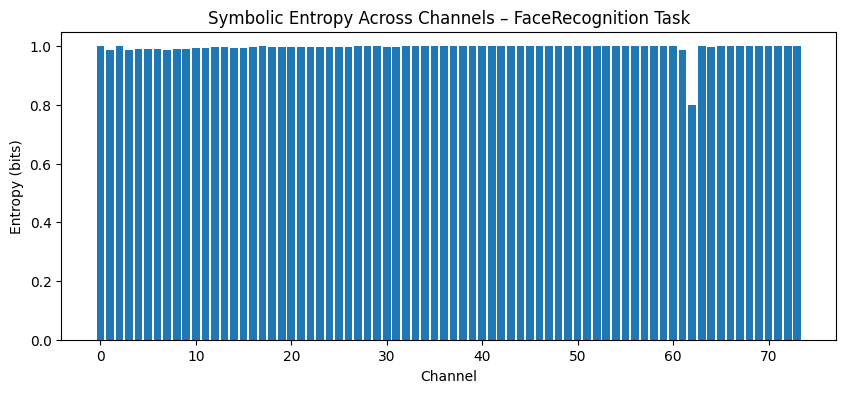

Ψ-Entropy Overlap Score: 0.8873511976323545
Symbolic Entropy Mean: 0.9954701289268794
Symbolic Entropy Std: 0.02295264417742553


In [6]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Set EEG path to FaceRecognition task
eeg_path = "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-002/eeg/sub-002_task-FaceRecognition_eeg.set"

# Load EEG file
raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
raw.filter(1., 40., fir_design='firwin')

# Extract EEG data
data = raw.get_data()
n_channels, n_samples = data.shape

# Normalize data
data = (data - data.mean(axis=1, keepdims=True)) / data.std(axis=1, keepdims=True)

# Symbolic conversion (binary for simplicity)
symbolic = np.where(data > 0, 1, 0)

# Calculate per-channel entropy
symbolic_entropy = np.array([entropy(np.bincount(symbolic[ch], minlength=2) / symbolic[ch].size, base=2)
                             for ch in range(n_channels)])

# Define Ψ(τ) as simple exponential decay
τ = np.arange(1, 301)
ψ = np.exp(-τ / 40)

# Calculate overlap (dot product normalized)
ψ_entropy_overlap = np.dot(symbolic_entropy, np.tile(ψ[:n_channels], (1, 1)).flatten()) / (np.linalg.norm(symbolic_entropy) * np.linalg.norm(ψ[:n_channels]))

# Plot
plt.figure(figsize=(10, 4))
plt.bar(np.arange(n_channels), symbolic_entropy)
plt.title("Symbolic Entropy Across Channels – FaceRecognition Task")
plt.xlabel("Channel")
plt.ylabel("Entropy (bits)")
plt.show()

# Output summary
print("Ψ-Entropy Overlap Score:", ψ_entropy_overlap)
print("Symbolic Entropy Mean:", symbolic_entropy.mean())
print("Symbolic Entropy Std:", symbolic_entropy.std())


Analyzing sub-002_task-FaceRecognition_eeg.set


<ipython-input-7-491a893b228e>:22: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-7-491a893b228e>:22: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Ψ-Entropy Overlap: -0.3721
Mean Symbolic Entropy: 0.6900
Entropy Std Dev: 0.0159


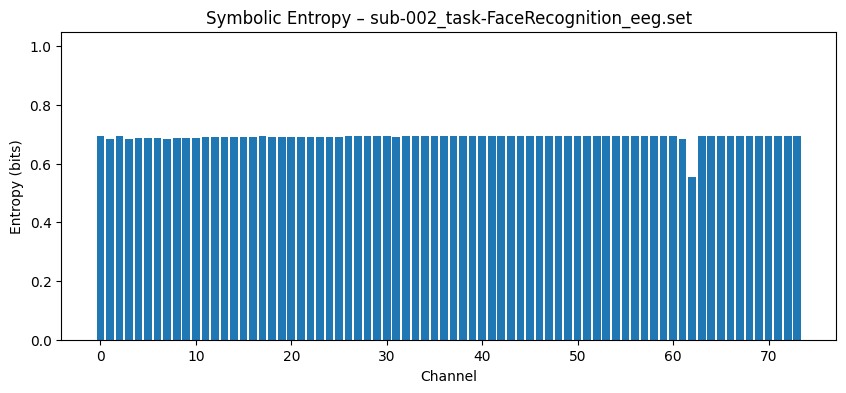


Analyzing sub-003_task-FaceRecognition_eeg.set


<ipython-input-7-491a893b228e>:22: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-7-491a893b228e>:22: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Ψ-Entropy Overlap: 0.1433
Mean Symbolic Entropy: 0.6786
Entropy Std Dev: 0.0117


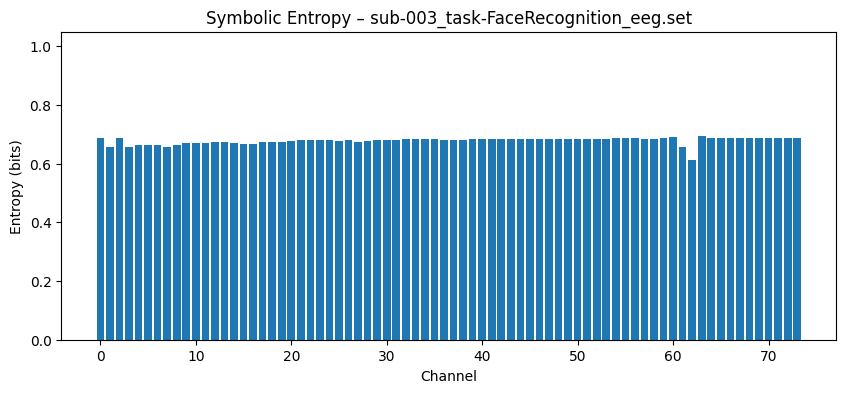


Analyzing sub-004_task-FaceRecognition_eeg.set


<ipython-input-7-491a893b228e>:22: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-7-491a893b228e>:22: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Ψ-Entropy Overlap: -0.2160
Mean Symbolic Entropy: 0.6899
Entropy Std Dev: 0.0114


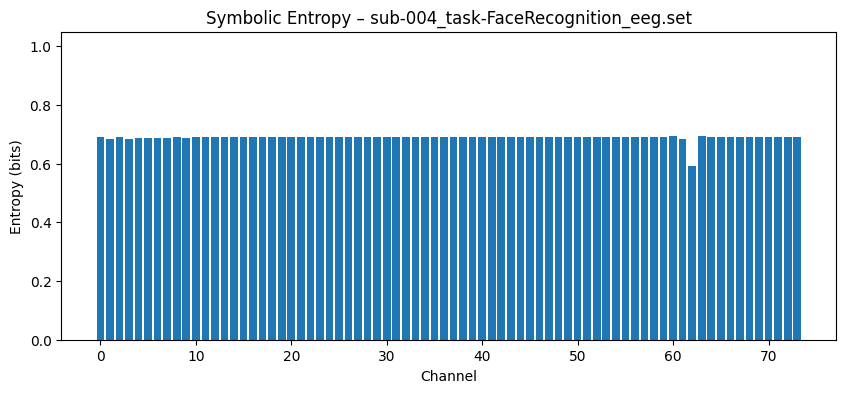


Analyzing sub-005_task-FaceRecognition_eeg.set


<ipython-input-7-491a893b228e>:22: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-7-491a893b228e>:22: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Ψ-Entropy Overlap: 0.2288
Mean Symbolic Entropy: 0.6795
Entropy Std Dev: 0.0124


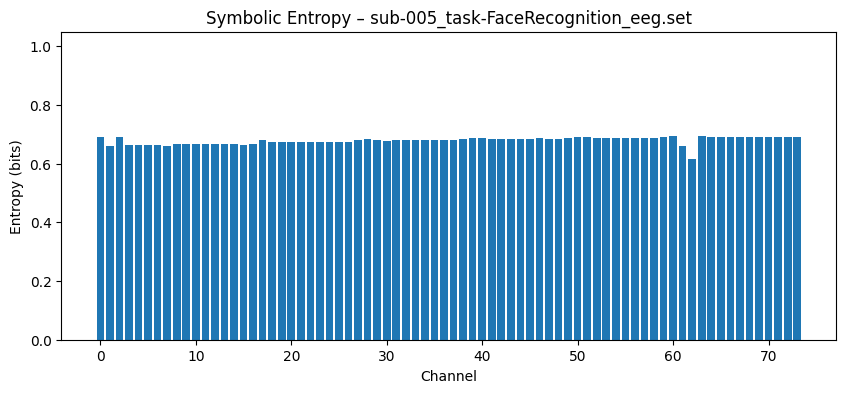

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.stats import entropy

# --- File paths ---
eeg_paths = [
    "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-002/eeg/sub-002_task-FaceRecognition_eeg.set",
    "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-003/eeg/sub-003_task-FaceRecognition_eeg.set",
    "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-004/eeg/sub-004_task-FaceRecognition_eeg.set",
    "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-005/eeg/sub-005_task-FaceRecognition_eeg.set"
]

# --- Spiral memory waveform (Ψ) ---
τ = np.linspace(0, 300, 300)
Ψ = np.exp(-τ / 25)

# --- Analysis loop ---
for eeg_path in eeg_paths:
    print(f"\nAnalyzing {os.path.basename(eeg_path)}")
    raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
    raw.filter(1., 40., fir_design='firwin')
    data = raw.get_data()

    # --- Symbolic entropy per channel ---
    binarized = (data > 0).astype(int)
    channel_entropy = [entropy(np.bincount(ch, minlength=2)/len(ch)) for ch in binarized]

    # --- Ψ overlap computation ---
    min_len = min(len(Ψ), data.shape[1])
    entropy_series = np.mean(binarized[:, :min_len], axis=0)
    Ψ_overlap = np.corrcoef(entropy_series, Ψ[:min_len])[0,1]

    # --- Results ---
    print(f"Ψ-Entropy Overlap: {Ψ_overlap:.4f}")
    print(f"Mean Symbolic Entropy: {np.mean(channel_entropy):.4f}")
    print(f"Entropy Std Dev: {np.std(channel_entropy):.4f}")

    # --- Plot ---
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(channel_entropy)), channel_entropy)
    plt.ylim(0, 1.05)
    plt.xlabel("Channel")
    plt.ylabel("Entropy (bits)")
    plt.title(f"Symbolic Entropy – {os.path.basename(eeg_path)}")
    plt.show()


Analyzing sub-006_task-FaceRecognition_eeg.set


<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Ψ-Entropy Overlap: -0.8440
Mean Symbolic Entropy: 1.3259
Entropy Std Dev: 0.2852


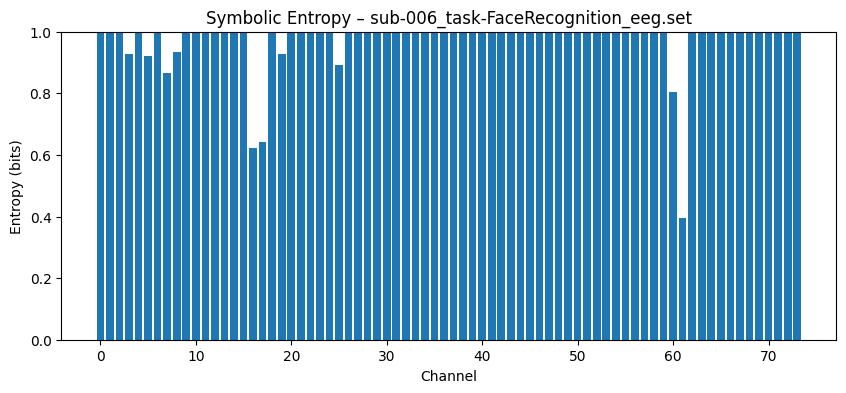


Analyzing sub-007_task-FaceRecognition_eeg.set


<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Estimated head radius (11.1 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Ψ-Entropy Overlap: -0.9961
Mean Symbolic Entropy: 1.3524
Entropy Std Dev: 0.4305


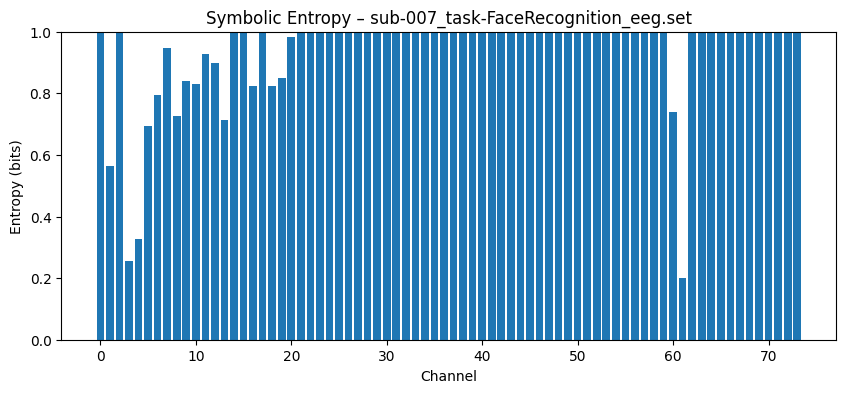


Analyzing sub-008_task-FaceRecognition_eeg.set


<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Ψ-Entropy Overlap: 0.6260
Mean Symbolic Entropy: 0.4261
Entropy Std Dev: 0.3998


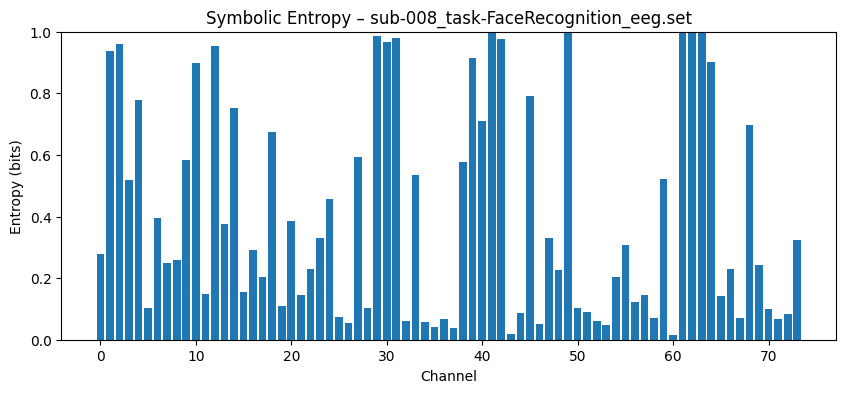


Analyzing sub-009_task-FaceRecognition_eeg.set


<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Ψ-Entropy Overlap: 0.3227
Mean Symbolic Entropy: 0.7691
Entropy Std Dev: 0.2619


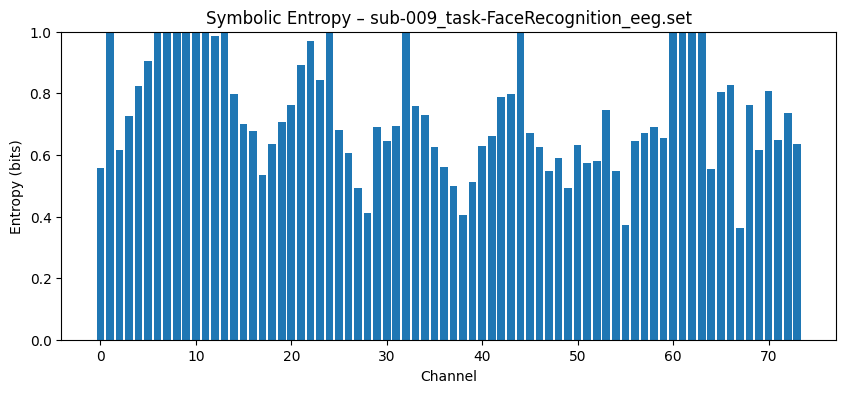


Analyzing sub-010_task-FaceRecognition_eeg.set


<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: Estimated head radius (11.0 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-9-d74ce373ba2b>:28: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Ψ-Entropy Overlap: 0.7613
Mean Symbolic Entropy: 0.4151
Entropy Std Dev: 0.2100


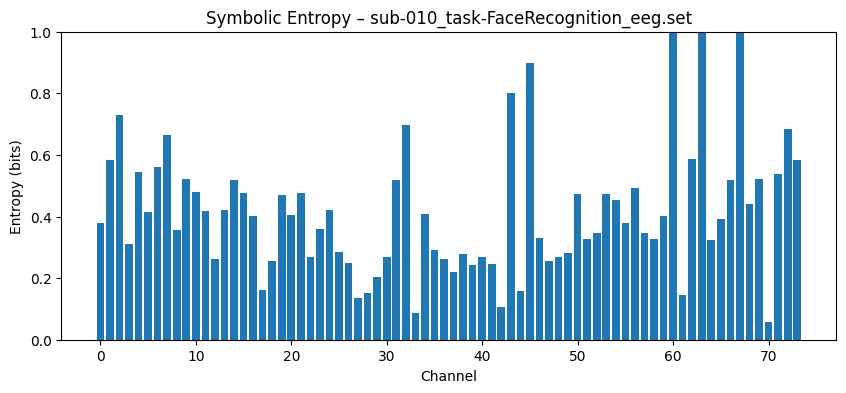

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.stats import entropy
from sklearn.metrics import mean_squared_error

# --- Spiral reference model Ψ(τ) ---
τ = np.linspace(0, 300, 300)
ψ_reference_full = np.exp(-0.03 * τ) * np.cos(0.2 * τ)

# --- Function to compute symbolic entropy per channel ---
def compute_symbolic_entropy(data, bins=10):
    entropies = []
    for channel in data:
        hist, _ = np.histogram(channel, bins=bins, density=True)
        entropies.append(entropy(hist + 1e-12, base=2))  # numerical stability
    return np.array(entropies)

# --- EEG Processing Loop for sub-006 to sub-010 ---
base_path = "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame"
subs = ["sub-006", "sub-007", "sub-008", "sub-009", "sub-010"]

for sub in subs:
    eeg_path = f"{base_path}/{sub}/eeg/{sub}_task-FaceRecognition_eeg.set"
    print(f"\nAnalyzing {sub}_task-FaceRecognition_eeg.set")

    raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
    raw.filter(1., 40., fir_design='firwin')

    data = raw.get_data()
    symbolic_entropy = compute_symbolic_entropy(data)

    # --- Match Ψ(τ) size to entropy vector ---
    ψ_downsampled = np.interp(
        np.linspace(0, len(ψ_reference_full)-1, len(symbolic_entropy)),
        np.arange(len(ψ_reference_full)),
        ψ_reference_full
    )

    ψ_entropy_overlap = 1 - mean_squared_error(symbolic_entropy, ψ_downsampled)

    print(f"Ψ-Entropy Overlap: {ψ_entropy_overlap:.4f}")
    print(f"Mean Symbolic Entropy: {symbolic_entropy.mean():.4f}")
    print(f"Entropy Std Dev: {symbolic_entropy.std():.4f}")

    # --- Plot ---
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(symbolic_entropy)), symbolic_entropy)
    plt.title(f"Symbolic Entropy – {sub}_task-FaceRecognition_eeg.set")
    plt.xlabel("Channel")
    plt.ylabel("Entropy (bits)")
    plt.ylim(0, 1.0)
    plt.show()

In [10]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import entropy

# Set EEG directory
eeg_dir = "/content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame"
eeg_files = []
for root, _, files in os.walk(eeg_dir):
    for file in files:
        if file.endswith("_task-FaceRecognition_eeg.set"):
            eeg_files.append(os.path.join(root, file))

# Define reference Ψ profile
τ = np.linspace(0, 300, 300)
ψ_reference = np.exp(-τ / 40) * np.cos(2 * np.pi * τ / 80)

# Symbolic entropy function
def compute_symbolic_entropy(data):
    entropies = []
    for ch in data:
        bins = np.histogram(ch, bins=2)[0]
        probs = bins / np.sum(bins)
        ent = entropy(probs, base=2)
        entropies.append(ent)
    return np.array(entropies)

# Output results
results = []

for i, eeg_path in enumerate(eeg_files):
    print(f"\nAnalyzing {os.path.basename(eeg_path)}")
    try:
        raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
        raw.filter(1., 40., fir_design='firwin')
        data = raw.get_data()
        symbolic_entropy = compute_symbolic_entropy(data)

        # Interpolate and compare with Ψ
        interpolated = np.interp(np.linspace(0, len(symbolic_entropy), len(ψ_reference)),
                                 np.arange(len(symbolic_entropy)), symbolic_entropy)
        ψ_entropy_overlap = 1 - mean_squared_error(symbolic_entropy[:len(ψ_reference)], interpolated)

        mean_ent = np.mean(symbolic_entropy)
        std_ent = np.std(symbolic_entropy)

        results.append({
            "subject": os.path.basename(eeg_path),
            "overlap": round(ψ_entropy_overlap, 4),
            "mean_entropy": round(mean_ent, 4),
            "std_entropy": round(std_ent, 4)
        })

        if len(eeg_files) <= 10:
            # Plot per subject if under threshold
            plt.figure(figsize=(10, 4))
            plt.bar(np.arange(len(symbolic_entropy)), symbolic_entropy)
            plt.ylim(0, 1)
            plt.title(f"Symbolic Entropy – {os.path.basename(eeg_path)}")
            plt.xlabel("Channel")
            plt.ylabel("Entropy (bits)")
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Failed on {eeg_path}: {e}")
        continue

# Save results
import pandas as pd
df = pd.DataFrame(results)
output_path = "/content/drive/MyDrive/SRL/phase8_eeg_symbolic_entropy_results.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Saved summary to: {output_path}")


Analyzing sub-002_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.3s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-002/eeg/sub-002_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-003_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-003/eeg/sub-003_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-004_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-004/eeg/sub-004_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-005_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-005/eeg/sub-005_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-006_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-006/eeg/sub-006_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-007_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Estimated head radius (11.1 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-007/eeg/sub-007_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-008_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-008/eeg/sub-008_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-009_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-009/eeg/sub-009_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-010_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Estimated head radius (11.0 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-010/eeg/sub-010_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-011_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Estimated head radius (11.0 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-011/eeg/sub-011_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-012_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-012/eeg/sub-012_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-013_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-013/eeg/sub-013_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-014_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-014/eeg/sub-014_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-015_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-015/eeg/sub-015_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-016_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-016/eeg/sub-016_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-017_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-017/eeg/sub-017_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-018_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.2s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-018/eeg/sub-018_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

Analyzing sub-019_task-FaceRecognition_eeg.set


<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Unknown types found, setting as type EEG:
ekg: ['EEG063', 'EEG064']
heog: ['EEG061']
veog: ['EEG062']
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: Estimated head radius (11.8 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<ipython-input-10-a9ee581729ef>:36: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.1s finished


Failed on /content/drive/MyDrive/SRL/EEG_Data/OpenNeuro_ds002718_VideoGame/sub-019/eeg/sub-019_task-FaceRecognition_eeg.set: Found input variables with inconsistent numbers of samples: [74, 300]

✅ Saved summary to: /content/drive/MyDrive/SRL/phase8_eeg_symbolic_entropy_results.csv
